In [1]:
# Python 3
import jpeg as JPEG
import libs.ruidos as ruido
from skimage import io
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
# from util import *

In [41]:
# img_show helpers
def img_matrix_show(mat_img, fg = (10,10)):
    plt.clf()
    plt.figure(figsize=fg)
    plt.grid(False)
    rows = len(mat_img)
    is_matrix = isinstance(mat_img[0], list)
    if is_matrix:
        cols = len(mat_img[0])
    else:
        cols = 1
    for i in range(rows):
        for j in range(cols):
            if is_matrix:
                plt.subplot(rows, cols, cols*i+(j+1))
                plt.imshow(mat_img[i][j])
            else:
                plt.subplot(cols, rows, cols*i+(j+1))
                plt.imshow(mat_img[i])
            plt.axis('off')
    plt.show()

In [3]:
def compression_rate(img, Q_factor):
    assert(0 < Q_factor and Q_factor <= 100)
    compressed_img = JPEG.jpeg_encode(img, Q_factor)
    return JPEG.img_size(img)/compressed_img.size()

def compress_and_get(img, Q_factor):
    compressed_img = JPEG.jpeg_encode(img, Q_factor)
    uncompressed_img = JPEG.jpeg_decode(compressed_img)
    return uncompressed_img, compressed_img.size()

In [23]:
img = io.imread('bmp/lena.bmp')

Me traigo todas las imágenes del la ruta *bmp/*, las como para probar la curva de compresion con diferentes imagenes.

In [13]:
from os import listdir
from os.path import isfile, join
ruta_imagenes = "bmp/"
imagenes = [f for f in listdir(ruta_imagenes) if isfile(join(ruta_imagenes, f))]
print(imagenes)

Q_factor_values = np.arange(1,99,5)

['sun.bmp', 'no_homogenea.bmp', 'lena.bmp', 'lena_200x200.bmp', 'geom.bmp', 'text.bmp', 'vicunas.bmp']


In [ ]:
compressed_img_sizes = np.empty(len(Q_factor_values), dtype=np.float)
compression_rates = np.empty(len(Q_factor_values), dtype=np.float)
all_compression_rates = np.zeros(\
                                 (len(imagenes),len(Q_factor_values)),\
                                 dtype=np.float\
                                )

j = 0 #variable para ir siguiendo el num de imagen que voy comprimiendo
for img_name in imagenes:
    img = io.imread(ruta_imagenes + img_name)
    img_size = JPEG.img_size(img)

    print("comprimiendo %s" % (img_name))
    
    compressed_img_sizes = np.empty(len(Q_factor_values), dtype=np.float)
    compression_rates = np.empty(len(Q_factor_values), dtype=np.float)
    
    for i in range(len(compressed_img_sizes)):
        print("comprimiento con Q_factor %.2f" % (Q_factor_values[i]))
        _, compressed_img_sizes[i] = compress_and_get(img,Q_factor_values[i])
        compression_rates[i] = img_size/compressed_img_sizes[i]
        
    all_compression_rates[j] = compression_rates
    j+=1

print(all_compression_rates)

In [27]:
np.save("pickles/muchos_CR.np", all_compression_rates)

In [17]:
all_compression_rates = np.load("pickles/muchos_CR.npy")

Aca la idea es plotear para cada imagen, la curva de compresion que se obtuvo, como para mostrarlo para cierta variedad

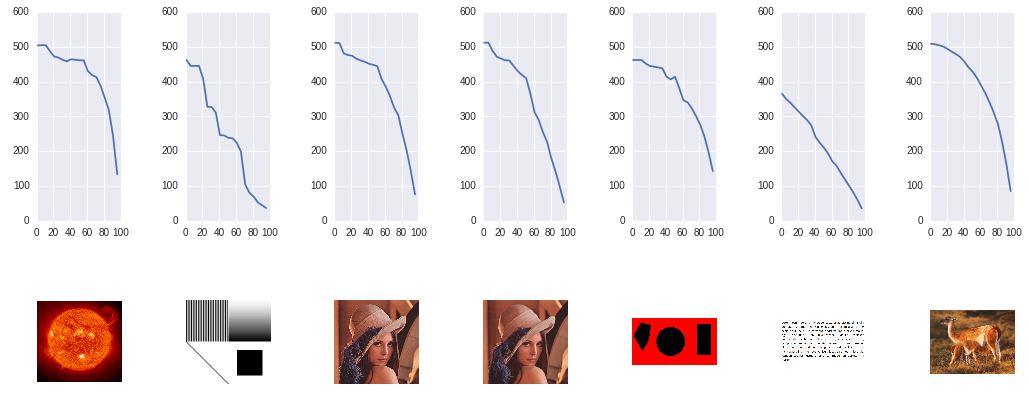

In [21]:
plt.rcParams.update({'font.size': 30})
_font_size_labes = 20
_font_size_ticks = 10
plt.figure(figsize=(15,7))

# Agregar que compartan el eje y

c_im = len(imagenes)
for k in range(c_im):
    # imagen a la cual corresponde la curva
    plt.subplot(2,c_im, c_im+k+1)
    plt.grid(False)
    plt.axis("off")
    plt.imshow(io.imread(ruta_imagenes + imagenes[k]))
    
    # curva de compresión
    if k == 1:
        ax = plt.subplot(2,c_im, k+1)
    else:
        plt.subplot(2,c_im, k+1, sharey=ax)
    10:30
#     plt.xlabel("factor de calidad", fontsize=_font_size_labes)
#     plt.ylabel("img_size / compressed_size", fontsize=_font_size_labes)
    plt.plot(Q_factor_values, all_compression_rates[k])
    plt.tick_params(labelsize=_font_size_ticks)
plt.tight_layout()
plt.show()

In [ ]:
img = io.imread('bmp/lena.bmp')

In [123]:
def noise_compression_exp(img, nfs, Q_facts):
    crs = [None]*len(nfs)

    i = 0
    for contamination_func in nfs:
        print("Next noise function")
        # contamino la imagen
        img_to_test = contamination_func(img)
        # array donde guardar los CR obtenidos
        compression_rates_obtained = []
        for q in Q_facts:
            print("comprimiendo con Q = %.2f" % (q))
            # comprimo la imagen contaminada con contamination_func[k] y Q_compression rate
            compression_rates_obtained.append(compression_rate(img_to_test, q))
        crs[i] = np.copy(np.array(compression_rates_obtained))
        i+=1

    print(compressed_results)
    
    return compressed_results

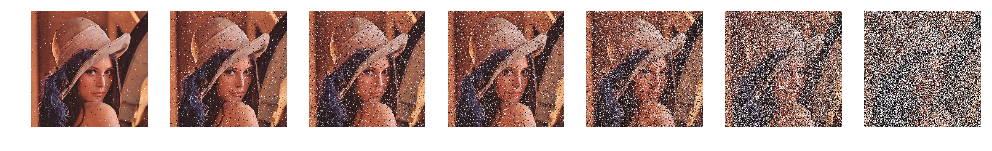

In [91]:
# defines del experimento
probs = [.01,.05,.1, .125,.25, .5, .75]
Q_factors = np.arange(1,99,5)
def get_noise_function(p): return lambda arg: ruido.pep_salt_noise(arg,p)
noise_functions = [get_noise_function(p) for p in probs]
# imagenes originales
img_matrix_show([nf(img) for nf in noise_functions], fg=(17,10))

In [92]:
compressed_results = [None]*len(probs)

i = 0
for contamination_func in noise_functions:
    print("Next noise function")
    # contamino la imagen
    img_to_test = contamination_func(img)
    # array donde guardar los CR obtenidos
    compression_rates_obtained = []
    for q in Q_factors:
        print("comprimiendo con Q = %.2f" % (q))
        # comprimo la imagen contaminada con contamination_func[k] y Q_compression rate
        compression_rates_obtained.append(compression_rate(img_to_test, q))
    compressed_results[i] = np.copy(np.array(compression_rates_obtained))
    i+=1
    
print(compressed_results)

Next noise function
comprimiendo con Q = 1.00
comprimiendo con Q = 6.00
comprimiendo con Q = 11.00
comprimiendo con Q = 16.00
comprimiendo con Q = 21.00
comprimiendo con Q = 26.00
comprimiendo con Q = 31.00
comprimiendo con Q = 36.00
comprimiendo con Q = 41.00
comprimiendo con Q = 46.00
comprimiendo con Q = 51.00
comprimiendo con Q = 56.00
comprimiendo con Q = 61.00
comprimiendo con Q = 66.00
comprimiendo con Q = 71.00
comprimiendo con Q = 76.00
comprimiendo con Q = 81.00
comprimiendo con Q = 86.00
comprimiendo con Q = 91.00
comprimiendo con Q = 96.00
Next noise function
comprimiendo con Q = 1.00
comprimiendo con Q = 6.00
comprimiendo con Q = 11.00
comprimiendo con Q = 16.00
comprimiendo con Q = 21.00
comprimiendo con Q = 26.00
comprimiendo con Q = 31.00
comprimiendo con Q = 36.00
comprimiendo con Q = 41.00
comprimiendo con Q = 46.00
comprimiendo con Q = 51.00
comprimiendo con Q = 56.00
comprimiendo con Q = 61.00
comprimiendo con Q = 66.00
comprimiendo con Q = 71.00
comprimiendo con Q 

In [69]:
original_img_CRs = [compression_rate(img,q) for q in Q_factors]

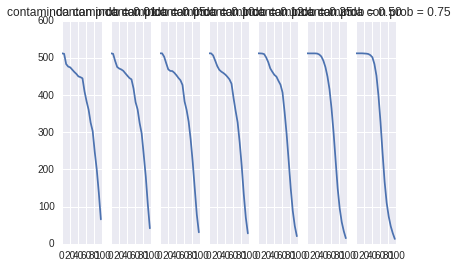

In [93]:
plt.clf()
plt.figure(figsize=(15,10))
f, figs = plt.subplots(1,len(probs),sharey=True)
for i in range(len(probs)):
    figs[i].plot(Q_factors, compressed_results[i])
    figs[i].set_title("contaminda con prob = %.2f" % (probs[i]))
plt.show()

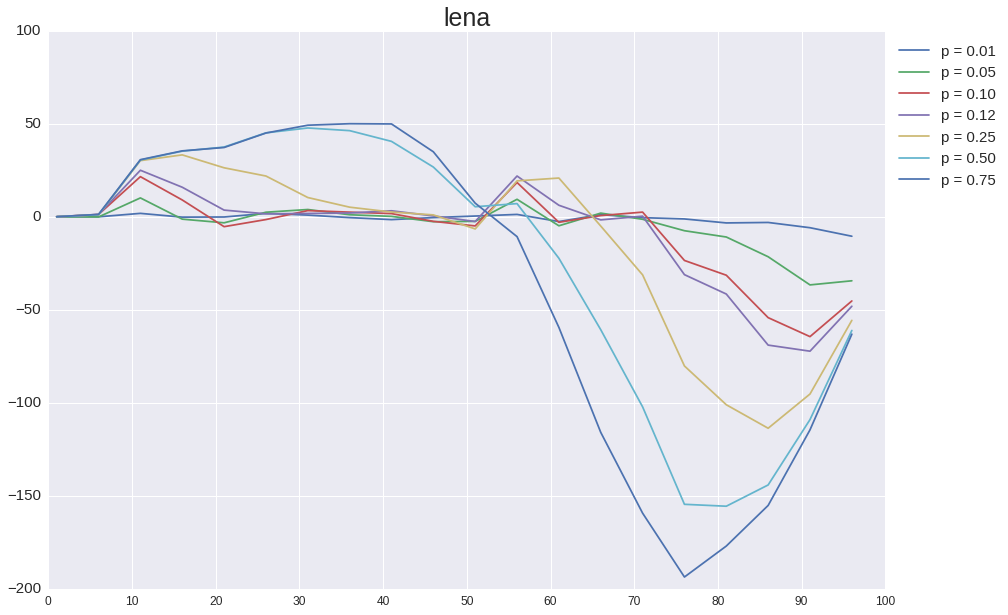

In [120]:
# plt.clf()
plt.figure(figsize=(15,10))
for i in range(len(probs)):
    label = "p = %.2f" % (probs[i])
    plt.plot(Q_factors, compressed_results[i] - original_img_CRs, label=label)
plt.legend(bbox_to_anchor=(1,1), loc="upper left", prop={'size':15})
plt.xticks(range(0,101,10), fontsize=12)
plt.yticks(fontsize=15)
plt.title("lena", fontsize=25)
plt.show()

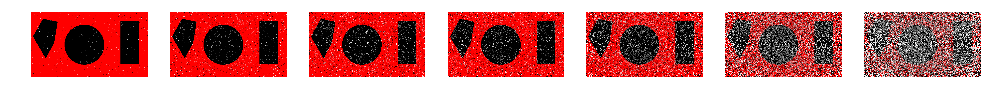

In [124]:
img_test_2 = io.imread("bmp/geom.bmp")
img_matrix_show([ns(img_test_2) for ns in noise_functions], fg=(17,10))

In [125]:
crs2 = noise_compression_exp(img_test_2, noise_functions, Q_factors)

Next noise function
comprimiendo con Q = 1.00
comprimiendo con Q = 6.00
comprimiendo con Q = 11.00
comprimiendo con Q = 16.00
comprimiendo con Q = 21.00
comprimiendo con Q = 26.00
comprimiendo con Q = 31.00
comprimiendo con Q = 36.00
comprimiendo con Q = 41.00
comprimiendo con Q = 46.00
comprimiendo con Q = 51.00
comprimiendo con Q = 56.00
comprimiendo con Q = 61.00
comprimiendo con Q = 66.00
comprimiendo con Q = 71.00
comprimiendo con Q = 76.00
comprimiendo con Q = 81.00
comprimiendo con Q = 86.00
comprimiendo con Q = 91.00
comprimiendo con Q = 96.00
Next noise function
comprimiendo con Q = 1.00
comprimiendo con Q = 6.00
comprimiendo con Q = 11.00
comprimiendo con Q = 16.00
comprimiendo con Q = 21.00
comprimiendo con Q = 26.00
comprimiendo con Q = 31.00
comprimiendo con Q = 36.00
comprimiendo con Q = 41.00
comprimiendo con Q = 46.00
comprimiendo con Q = 51.00
comprimiendo con Q = 56.00
comprimiendo con Q = 61.00
comprimiendo con Q = 66.00
comprimiendo con Q = 71.00
comprimiendo con Q 

In [126]:
original_img_test_CRs = [compression_rate(img_test_2,q) for q in Q_factors]

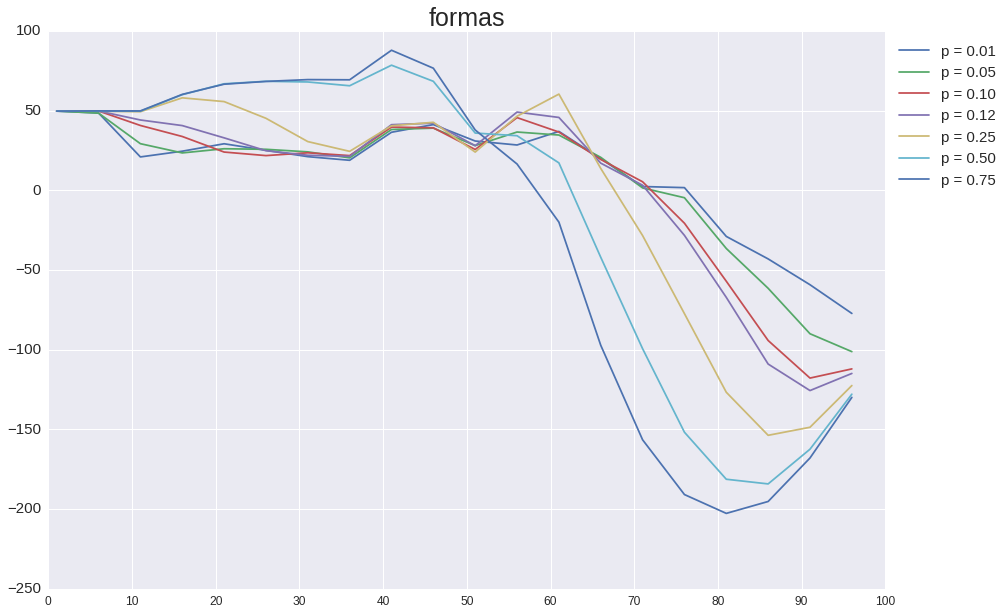

In [131]:
# plt.clf()
plt.figure(figsize=(15,10))
for i in range(len(probs)):
    label = "p = %.2f" % (probs[i])
    plt.plot(Q_factors, crs2[i] - original_img_test_CRs, label=label)
plt.legend(bbox_to_anchor=(1,1), loc="upper left", prop={'size':15})
plt.xticks(range(0,101,10), fontsize=12)
plt.yticks(fontsize=15)
plt.title("formas", fontsize=25)
plt.show()